# t-SNE Analysis of Query Embeddings

## Preliminary

In [1]:
%matplotlib inline

In [51]:
from __future__ import division
from __future__ import print_function
from sklearn import manifold
import cPickle as pickle
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.5, 5]

## Analysis of VisionSpeech embeddings

In [125]:
# keywords_filter = ["baby", "beach", "bike", "climbing", "running", "tennis"]
keywords_filter = [
    "baby", "boy", "children", "young",
    "ball", "field", "football", "grass", "running", "soccer"
    ]

In [138]:
# Get embeddings
# pkl_fn = "models/train_visionspeech_cnn/332147c538/sigmoid_output_dict.dev_queries_all.pkl"
# pkl_fn = "models/train_visionspeech_cnn/332147c538/sigmoid_final_feedforward_dict.dev_queries_all.pkl"
pkl_fn = "models/train_visionspeech_cnn/332147c538/sigmoid_final_feedforward_dict.dev_queries.pkl"
with open(pkl_fn, "rb") as f:
    features_dict = pickle.load(f)
labels = []
embeddings = []
for utt_key in features_dict:
    label = utt_key.split("_")[0]
#     if label not in keywords_filter:
#         continue
    labels.append(label)
    embeddings.append(features_dict[utt_key])

In [139]:
# Normalize embeddings
embeddings = np.array(embeddings)
print("Embeddings shape:", embeddings.shape)
print("Embeddings min:", np.min(embeddings))
print("Embeddings max:", np.max(embeddings))
print("Embeddings mean:", np.mean(embeddings))
# embeddings = embeddings - 0.5
# embeddings = (embeddings.T/np.linalg.norm(embeddings, axis=1)).T
# np.mean(np.array(embeddings), axis=0)

Embeddings shape: (1995, 3000)
Embeddings min: 0.5
Embeddings max: 0.994599
Embeddings mean: 0.550979


In [140]:
tsne = manifold.TSNE(n_components=2, perplexity=5, init="random", random_state=0)
X_tsne = tsne.fit_transform(embeddings)

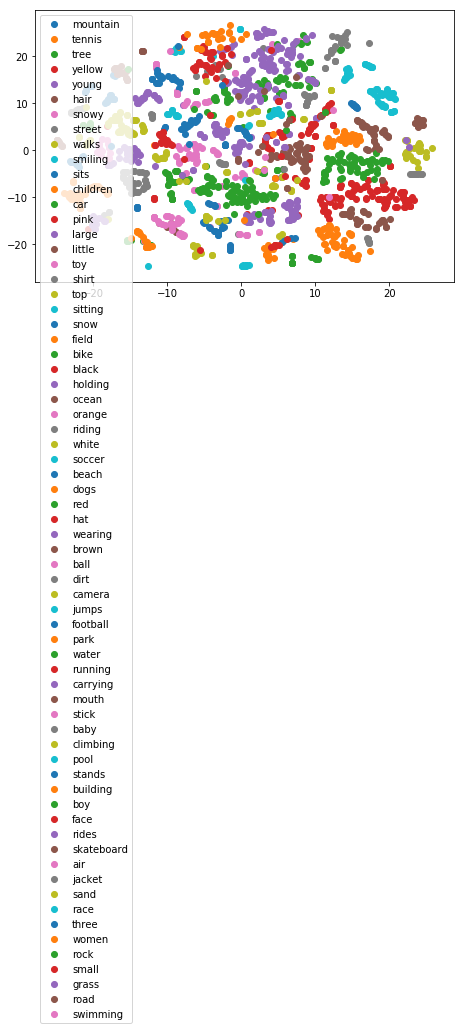

In [141]:
def plot_labelled_2d_data(X, labels):
    
#     # Get a unique color for each class
#     cmap = plt.cm.get_cmap("viridis")
#     label_to_color = {}
    classes = set(labels)
#     for i, label in enumerate(sorted(classes)):
#         label_to_color[label] = cmap(float(i) / len(classes))
    
    # Plot the different classes
    for label in classes:
        indices = np.where(np.array(labels) == label)[0]
        plt.scatter(X[indices, 0], X[indices, 1], label=label) #, c=np.array([label_to_color[label]]))
    plt.legend()
    
    
#     # Assign a unique ID and color for each label
#     label_to_id = {}
#     for i, label in enumerate(sorted(set(labels))):
#         label_to_id[label] = i
#     colors = []
#     for label in labels:
#         colors.append(label_to_id[label])
    
#     plt.scatter(X[:, 0], X[:, 1], c=colors)
    
plot_labelled_2d_data(X_tsne, labels)